In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth,square

Time and Signal Generation

10000 10000


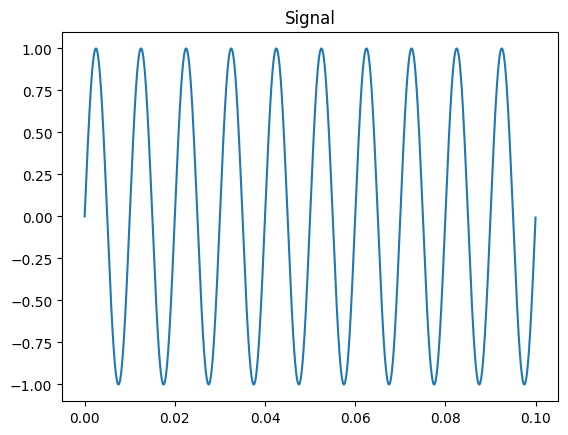

In [42]:
time = np.linspace(0, 0.1, 10000, endpoint=False)
mssg_f = 100
dc = 2
sig = np.sin(2 * np.pi * mssg_f * time) 
print(len(time), len(sig))

# Plotting the original signal
plt.plot(time, sig)
plt.title("Signal")
plt.show()

sampling signal

160 160


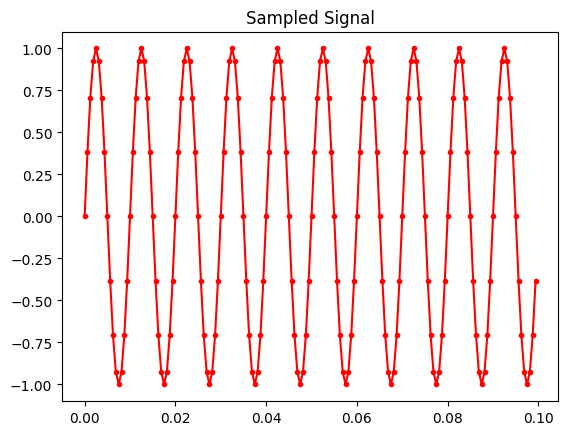

In [43]:
fs = 16 * mssg_f
ts = np.arange(0, 0.1, 1 / fs)
sampled_signal =np.sin(2 * np.pi * mssg_f * ts)
print(len(ts), len(sampled_signal))
# Plotting the sampled signal
plt.plot(ts, sampled_signal, "r.-")
plt.title("Sampled Signal")
plt.show()

Quantizing the signal

['100', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '100', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '100', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001'

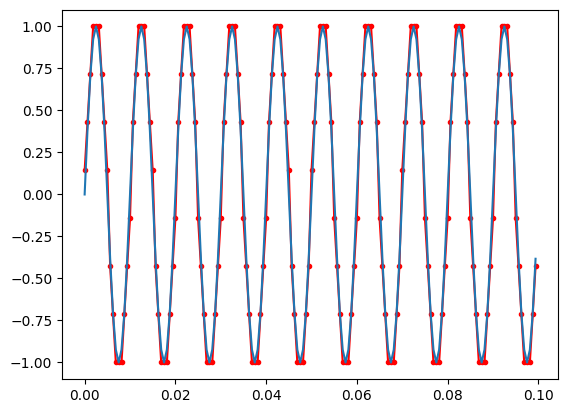

In [45]:
L = int(input("Enter no.of quantization levels: "))
sig_min = round(min(sampled_signal))
sig_max = round(max(sampled_signal))
q_levels = np.linspace(sig_min, sig_max, L)
q_sig = [min(q_levels, key=lambda x: abs(x - s)) for s in sampled_signal]
plt.plot(ts,q_sig, "r.-")
plt.plot(ts,sampled_signal)
bit=int(np.log2(L))
binary_code={levels:format(i, f'0{bit}b') for i,levels in enumerate(q_levels)}
encoded_signal=[]
for i in q_sig:
    encoded_signal.append(binary_code[i])

print(encoded_signal)

Encoding the quantized signal

Quantization Levels Mapping: {-1.0: 0, -0.7142857142857143: 1, -0.4285714285714286: 2, -0.1428571428571429: 3, 0.1428571428571428: 4, 0.4285714285714284: 5, 0.7142857142857142: 6, 1.0: 7}

Binary Code: {0: '000', 1: '001', 2: '010', 3: '011', 4: '100', 5: '101', 6: '110', 7: '111'}

Encoded Signal: [4, 5, 6, 7, 7, 7, 6, 5, 4, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 4, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 4, 2, 1, 0, 0, 0, 1, 2, 4, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 4, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2, 3, 5, 6, 7, 7, 7, 6, 5, 3, 2, 1, 0, 0, 0, 1, 2]


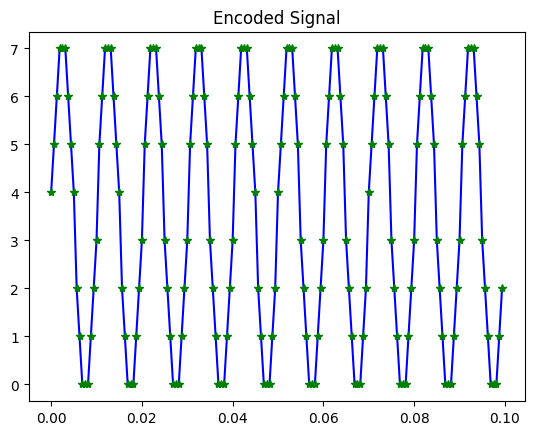

In [34]:
q_level_map = {q: idx for idx, q in enumerate(q_levels)}
bit_no = int(np.log2(L))
binary_code = {i: format(i, f'0{bit_no}b') for i in range(L)}

print("Quantization Levels Mapping:", q_level_map)
print("\nBinary Code:", binary_code)

encoded_signal = [q_level_map[q] for q in q_sig]
print("\nEncoded Signal:", encoded_signal)

# Plotting the encoded signal
plt.plot(ts, encoded_signal, "b", ts, encoded_signal, "g*")
plt.title("Encoded Signal")
plt.show()


generation of binary code

Binary Coded Signal: ['100', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '100', '010', '001', '000', '000', '000', '001', '010', '100', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '100', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000', '000', '000', '001', '010', '011', '101', '110', '111', '111', '111', '110', '101', '011', '010', '001', '000'

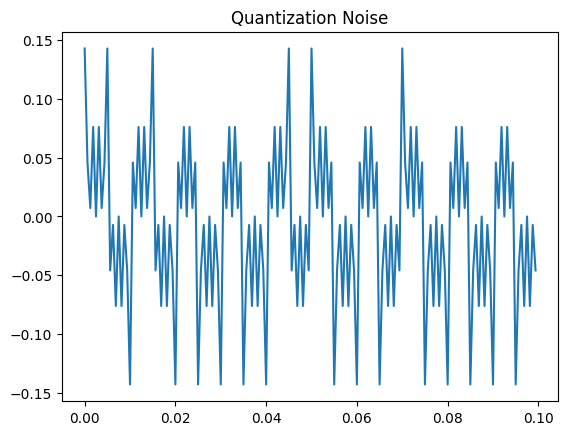

In [35]:

binary_coded_signal = [binary_code[k] for k in encoded_signal]
print("Binary Coded Signal:", binary_coded_signal)

q_noise = np.array(q_sig) - sampled_signal

# Plotting the quantization noise
plt.plot(ts, q_noise)
plt.title("Quantization Noise")
plt.show()

snr

Signal-to-Noise ratio in dB:  40.840362688334196


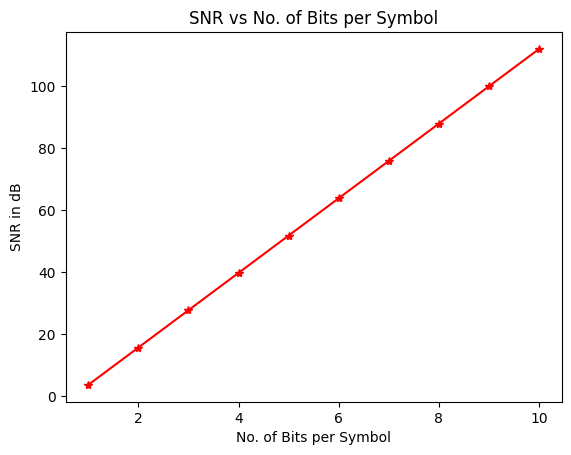

In [36]:
# Quantization Noise
def power(signal):
    return np.mean(np.square(signal))

# SNR vs Number of bits per symbol
p_signal = power(sig) 
p_noise = power(q_noise) 
snr = p_signal/p_noise 
snr_db = 20*np.log10(snr) 
print("Signal-to-Noise ratio in dB: ", snr_db) 
snr_db=[] 
s_min = round(min(sig)) 
s_max = round(max(sig)) 
power_signal = power(sig) 
for i in range(1,11): 
    R = i 
    L = 2**R 
    step_size = (s_max-s_min)/L 
    power_noise = (step_size**2)/3 
    snr = power_signal/power_noise 
    snr_db.append(20*np.log10(snr))
# Plotting SNR vs No. of bits per symbol
plt.plot(range(1, 11), snr_db, "r*-")
plt.xlabel("No. of Bits per Symbol")
plt.ylabel("SNR in dB")
plt.title("SNR vs No. of Bits per Symbol")
plt.show()

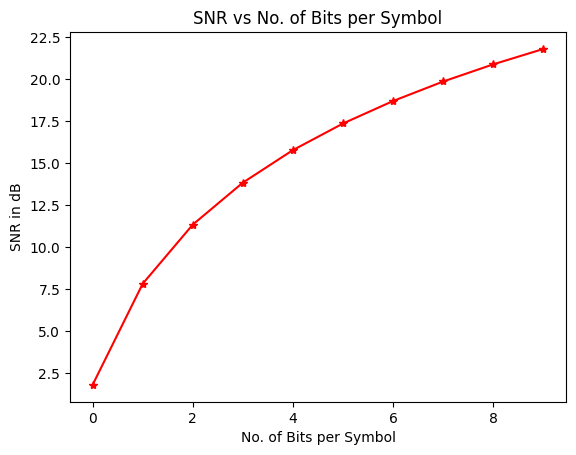

In [37]:
snr=1.8+6.02*np.log2(np.arange(1,11))

# Plotting SNR vs No. of bits per symbol
plt.plot(snr, "r*-")
plt.xlabel("No. of Bits per Symbol")
plt.ylabel("SNR in dB")
plt.title("SNR vs No. of Bits per Symbol")
plt.show()
